In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

def gaussian(x, A, x0, sigma): return A*np.exp(-(x-x0)**2/2./sigma**2)

def gaussian_mean(sync_offsets):
    hist, bins = np.histogram(sync_offsets, bins=50)
    
    mean = np.mean(sync_offsets)
    std = np.std(sync_offsets)
    
    bins = (bins[:-1] + bins[1:])/2

    coeffs, _ = curve_fit(gaussian, bins, hist, p0=[20, mean, std])
    
    return coeffs[1]

matplotlib.rc('xtick', labelsize=10)     
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', titlesize=10)
matplotlib.rc('axes', labelsize=10)
plt.rcParams["font.family"] = "serif"

sns.set_style('darkgrid')

Welcome to JupyROOT 6.12/04


## 60hr data set

In [2]:
filename = 'hdf5/60hr.h5'

tr_interp_df_1 = pd.read_hdf(filename, key='tr_df_1')
tr_interp_df_2 = pd.read_hdf(filename, key='tr_df_2')

tr_moment_df_1 = helper.calc_moment_df(tr_interp_df_1)
tr_moment_df_2 = helper.calc_moment_df(tr_interp_df_2)

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)

Finished calculating all moments for 4386 events.
Finished calculating all moments for 4363 events.
Removing trolley image from station 71.                        


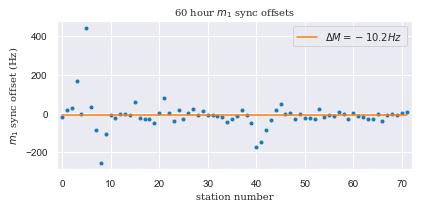

In [11]:
fig1, ax1 = plt.subplots(1,1)

ax1.plot(range(72), sync_offsets_1[:,0], '.')
ax1.plot(range(72), np.full(72,np.mean(sync_offsets_1[:,0])), label='$\Delta M = '+str(np.round(np.mean(sync_offsets_1[:,0]), 1))+'Hz$')

# ax1.set_xlim(1000,2000)
ax1.set_xlim(-1,72)
ax1.set_xlabel('station number', fontdict={'family':'serif'})
ax1.set_ylabel('$m_1$ sync offset (Hz)', fontdict={'family':'serif'})
ax1.set_title(r'60 hour $m_1$ sync offsets', fontdict={'family':'serif'})
ax1.legend(prop={'size':10, 'family':'serif'})

fig1.set_size_inches(6,3)
fig1.tight_layout()

In [ ]:
hist_m1, bins_m1 = np.histogram(sync_offsets_1[:,0], bins=50)

mean_m1 = np.mean(sync_offsets_1[:,0])
std_m1 = np.std(sync_offsets_1[:,0])

bins_m1 = (bins_m1[:-1] + bins_m1[1:])/2

plt.plot(bins_m1, hist_m1, '.')

coeffs_m1, _ = curve_fit(gaussian, bins_m1, hist_m1, p0=[20, mean_m1, std_m1])
plt.plot(bins_m1, gaussian(bins_m1, *coeffs_m1))
print coeffs_m1

In [ ]:
hist_m2, bins_m2 = np.histogram(sync_offsets_1[:,1], bins=50)

mean_m2 = np.mean(sync_offsets_1[:,1])
std_m2 = np.std(sync_offsets_1[:,1])

bins_m2 = (bins_m2[:-1] + bins_m2[1:])/2

plt.plot(bins_m2, hist_m2, '.')

coeffs_m2, _ = curve_fit(gaussian, bins_m2, hist_m2, p0=[20, mean_m2, std_m2])
plt.plot(bins_m2, gaussian(bins_m2, *coeffs_m2))
print coeffs_m2

In [ ]:
hist_m3, bins_m3 = np.histogram(sync_offsets_1[:,2], bins=50)

mean_m3 = np.mean(sync_offsets_1[:,2])
std_m3 = np.std(sync_offsets_1[:,2])

bins_m3 = (bins_m3[:-1] + bins_m3[1:])/2

plt.plot(bins_m3, hist_m3, '.')

coeffs_m3, _ = curve_fit(gaussian, bins_m3, hist_m3, p0=[20, mean_m3, std_m3])
plt.plot(bins_m3, gaussian(bins_m3, *coeffs_m3))
print coeffs_m3

In [ ]:
# 60 hour data set conclusions

print 'Delta M^2:'
print '  m_1 = ' + str(coeffs_m1[1]**2) + r' Hz^2'
print '  m_2 = ' + str(coeffs_m2[1]**2) + r' Hz^2'
print '  m_3 = ' + str(coeffs_m3[1]**2) + r' Hz^2'
print '\n'
print 'sigma:'
print '  m_1 = ' + str(np.abs(coeffs_m1[1])/2) + r' Hz^2 = ' + str(np.abs(coeffs_m1[1])/2/61.79*1000) + ' ppb'
print '  m_2 = ' + str(np.abs(coeffs_m2[1])/2) + r' Hz^2 = ' + str(np.abs(coeffs_m2[1])/2/61.79*1000) + ' ppb'
print '  m_3 = ' + str(np.abs(coeffs_m3[1])/2) + r' Hz^2 = ' + str(np.abs(coeffs_m3[1])/2/61.79*1000) + ' ppb'

In [ ]:
# print 'sigma:'

# DM2_1 = gaussian_mean(sync_offsets_1[:,0])**2

# avg_sigma_m1 = np.sqrt(DM2_1/4)

# print '  m_1 = ' + str(avg_sigma_m1) + r' Hz^2 = ' + str(avg_sigma_m1/61.79*1000) + ' ppb'

# ###

# DM2_1 = gaussian_mean(sync_offsets_1[:,1])**2

# avg_sigma_m2 = np.sqrt(DM2_1/4)

# print '  m_2 = ' + str(avg_sigma_m2) + r' Hz^2 = ' + str(avg_sigma_m2/61.79*1000) + ' ppb'

# ###

# DM2_1 = gaussian_mean(sync_offsets_1[:,2])**2

# avg_sigma_m3 = np.sqrt(DM2_1/4)

# print '  m_3 = ' + str(avg_sigma_m3) + r' Hz^2 = ' + str(avg_sigma_m3/61.79*1000) + ' ppb'

In [12]:
print 'sigma:'

DM2_1 = np.mean(sync_offsets_1[:,0])**2

avg_sigma_m1 = np.sqrt(DM2_1/4)

print '  m_1 = ' + str(avg_sigma_m1) + r' Hz^2 = ' + str(avg_sigma_m1/61.79*1000) + ' ppb'

###

DM2_1 = np.mean(sync_offsets_1[:,1])**2

avg_sigma_m2 = np.sqrt(DM2_1/4)

print '  m_2 = ' + str(avg_sigma_m2) + r' Hz^2 = ' + str(avg_sigma_m2/61.79*1000) + ' ppb'

###

DM2_1 = np.mean(sync_offsets_1[:,2])**2

avg_sigma_m3 = np.sqrt(DM2_1/4)

print '  m_3 = ' + str(avg_sigma_m3) + r' Hz^2 = ' + str(avg_sigma_m3/61.79*1000) + ' ppb'

###

DM2_1 = np.mean(sync_offsets_1[:,3])**2

avg_sigma_m4 = np.sqrt(DM2_1/4)

print '  m_4 = ' + str(avg_sigma_m4) + r' Hz^2 = ' + str(avg_sigma_m4/61.79*1000) + ' ppb'

###

DM2_1 = np.mean(sync_offsets_1[:,4])**2

avg_sigma_m5 = np.sqrt(DM2_1/4)

print '  m_5 = ' + str(avg_sigma_m5) + r' Hz^2 = ' + str(avg_sigma_m5/61.79*1000) + ' ppb'

sigma:
  m_1 = 5.116072807161548 Hz^2 = 82.79774732418754 ppb
  m_2 = 0.4222997688260194 Hz^2 = 6.834435488364127 ppb
  m_3 = 1.5515631734956132 Hz^2 = 25.11026336778788 ppb
  m_4 = 0.35355332102438153 Hz^2 = 5.721853390910852 ppb
  m_5 = 1.3743626816187036 Hz^2 = 22.242477449728167 ppb


## 9day data set

In [13]:
filename = 'hdf5/9day.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))
print 'tr run 4'
tr_moment_df_4 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_4'))
print 'tr run 5'
tr_moment_df_5 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_5'))
print 'tr run 6'
tr_moment_df_6 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_6'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)
sync_offsets_2, delta_t_2 = helper.sync_offset_calc(tr_corr_df_3, tr_corr_df_4)
sync_offsets_3, delta_t_3 = helper.sync_offset_calc(tr_corr_df_4, tr_corr_df_5)
sync_offsets_4, delta_t_4 = helper.sync_offset_calc(tr_corr_df_5, tr_corr_df_6)

tr run 1
Finished calculating all moments for 4344 events.
tr run 2
Finished calculating all moments for 4357 events.
tr run 3
Finished calculating all moments for 4359 events.
tr run 4
Finished calculating all moments for 4360 events.
tr run 5
Finished calculating all moments for 4702 events.
tr run 6
Finished calculating all moments for 4356 events.
Removing trolley image from station 71.                                                                           


In [14]:
#use these as estimators for Delta M^2

print 'sigma:'

t1 = np.mean(delta_t_1[:,0])
t2 = np.mean(delta_t_2[:,0])
t3 = np.mean(delta_t_3[:,0])
t4 = np.mean(delta_t_4[:,0])

DM2_1 = np.mean(sync_offsets_1[:,0])**2
DM2_2 = np.mean(sync_offsets_2[:,0])**2
DM2_3 = np.mean(sync_offsets_3[:,0])**2
DM2_4 = np.mean(sync_offsets_4[:,0])**2

avg_sigma_m1 = np.sqrt(1./(t1+t2+t3+t4) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/2))

print '  m_1 = ' + str(avg_sigma_m1) + r' Hz^2 = ' + str(avg_sigma_m1/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,1])
t2 = np.mean(delta_t_2[:,1])
t3 = np.mean(delta_t_3[:,1])
t4 = np.mean(delta_t_4[:,1])

DM2_1 = np.mean(sync_offsets_1[:,1])**2
DM2_2 = np.mean(sync_offsets_2[:,1])**2
DM2_3 = np.mean(sync_offsets_3[:,1])**2
DM2_4 = np.mean(sync_offsets_4[:,1])**2

avg_sigma_m2 = np.sqrt(1./(t1+t2+t3+t4) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/2))

print '  m_2 = ' + str(avg_sigma_m2) + r' Hz^2 = ' + str(avg_sigma_m2/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,2])
t2 = np.mean(delta_t_2[:,2])
t3 = np.mean(delta_t_3[:,2])
t4 = np.mean(delta_t_4[:,2])

DM2_1 = np.mean(sync_offsets_1[:,2])**2
DM2_2 = np.mean(sync_offsets_2[:,2])**2
DM2_3 = np.mean(sync_offsets_3[:,2])**2
DM2_4 = np.mean(sync_offsets_4[:,2])**2

avg_sigma_m3 = np.sqrt(1./(t1+t2+t3+t4) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/2))

print '  m_3 = ' + str(avg_sigma_m3) + r' Hz^2 = ' + str(avg_sigma_m3/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,3])
t2 = np.mean(delta_t_2[:,3])
t3 = np.mean(delta_t_3[:,3])
t4 = np.mean(delta_t_4[:,3])

DM2_1 = np.mean(sync_offsets_1[:,3])**2
DM2_2 = np.mean(sync_offsets_2[:,3])**2
DM2_3 = np.mean(sync_offsets_3[:,3])**2
DM2_4 = np.mean(sync_offsets_4[:,3])**2

avg_sigma_m4 = np.sqrt(1./(t1+t2+t3+t4) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/2))

print '  m_4 = ' + str(avg_sigma_m4) + r' Hz^2 = ' + str(avg_sigma_m4/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,4])
t2 = np.mean(delta_t_2[:,4])
t3 = np.mean(delta_t_3[:,4])
t4 = np.mean(delta_t_4[:,4])

DM2_1 = np.mean(sync_offsets_1[:,4])**2
DM2_2 = np.mean(sync_offsets_2[:,4])**2
DM2_3 = np.mean(sync_offsets_3[:,4])**2
DM2_4 = np.mean(sync_offsets_4[:,4])**2

avg_sigma_m5 = np.sqrt(1./(t1+t2+t3+t4) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/2))

print '  m_3 = ' + str(avg_sigma_m5) + r' Hz^2 = ' + str(avg_sigma_m5/61.79*1000) + ' ppb'

sigma:
  m_1 = 3.9769474426216456 Hz^2 = 64.3623149801205 ppb
  m_2 = 5.004513647472883 Hz^2 = 80.99229078285941 ppb
  m_3 = 2.2823988267491466 Hz^2 = 36.93799687245746 ppb
  m_4 = 0.3456479641449592 Hz^2 = 5.59391429268424 ppb
  m_3 = 1.186949068849619 Hz^2 = 19.209403930241447 ppb


## Endgame

In [15]:
filename = 'hdf5/endgame.h5'

print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))
print 'tr run 4'
tr_moment_df_4 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_4'))
print 'tr run 5'
tr_moment_df_5 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_5'))
print 'tr run 6'
tr_moment_df_6 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_6'))
print 'tr run 7'
tr_moment_df_7 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_7'))
print 'tr run 8'
tr_moment_df_8 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_8'))

tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)
tr_corr_df_7 = helper_old.trolley_footprint_replacement(tr_moment_df_7)
tr_corr_df_8 = helper_old.trolley_footprint_replacement(tr_moment_df_8)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_2, tr_corr_df_3)
sync_offsets_2, delta_t_2 = helper.sync_offset_calc(tr_corr_df_4, tr_corr_df_5)
sync_offsets_3, delta_t_3 = helper.sync_offset_calc(tr_corr_df_6, tr_corr_df_7)
sync_offsets_4, delta_t_4 = helper.sync_offset_calc(tr_corr_df_7, tr_corr_df_8)

tr run 2
Finished calculating all moments for 4914 events.
tr run 3
Finished calculating all moments for 4141 events.
tr run 4
Finished calculating all moments for 4350 events.
tr run 5
Finished calculating all moments for 4371 events.
tr run 6
Finished calculating all moments for 4345 events.
tr run 7
Finished calculating all moments for 4350 events.
tr run 8
Finished calculating all moments for 4394 events.
Removing trolley image from station 71.                                                                                           


In [16]:
# need time for last fixed probe run 6

fp_interp_df_6 = pd.read_hdf(filename, 'fp_df_6')
t5 = np.max(fp_interp_df_6.index.values) - np.min(fp_interp_df_6.index.values)
print t5

280859.0


In [17]:
print np.mean(sync_offsets_1[:,0])
print np.mean(sync_offsets_2[:,0])
print np.mean(sync_offsets_3[:,0])
print np.mean(sync_offsets_4[:,0])

29.37635160697983
3.1858036366542546
-21.18417238446099
13.929476131936008


In [18]:
# use max Delta M^2 from other runs to estimate trolley pair 8-9


print 'sigma:'

t1 = np.mean(delta_t_1[:,0])
t2 = np.mean(delta_t_2[:,0])
t3 = np.mean(delta_t_3[:,0])
t4 = np.mean(delta_t_4[:,0])

DM2_1 = np.mean(sync_offsets_1[:,0])**2
DM2_2 = np.mean(sync_offsets_2[:,0])**2
DM2_3 = np.mean(sync_offsets_3[:,0])**2
DM2_4 = np.mean(sync_offsets_4[:,0])**2

DM2_5 = np.max(np.abs(np.array([DM2_1, DM2_2, DM2_3, DM2_4])))

avg_sigma_m1 = np.sqrt(1./(t1+t2+t3+t4+t5) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/4 + t5*DM2_5/2))

print '  m_1 = ' + str(avg_sigma_m1) + r' Hz^2 = ' + str(avg_sigma_m1/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,1])
t2 = np.mean(delta_t_2[:,1])
t3 = np.mean(delta_t_3[:,1])
t4 = np.mean(delta_t_4[:,1])

DM2_1 = np.mean(sync_offsets_1[:,1])**2
DM2_2 = np.mean(sync_offsets_2[:,1])**2
DM2_3 = np.mean(sync_offsets_3[:,1])**2
DM2_4 = np.mean(sync_offsets_4[:,1])**2

DM2_5 = np.max([DM2_1, DM2_2, DM2_3, DM2_4])

avg_sigma_m2 = np.sqrt(1./(t1+t2+t3+t4+t5) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/4 + t5*DM2_5/2))

print '  m_2 = ' + str(avg_sigma_m2) + r' Hz^2 = ' + str(avg_sigma_m2/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,2])
t2 = np.mean(delta_t_2[:,2])
t3 = np.mean(delta_t_3[:,2])
t4 = np.mean(delta_t_4[:,2])

DM2_1 = np.mean(sync_offsets_1[:,2])**2
DM2_2 = np.mean(sync_offsets_2[:,2])**2
DM2_3 = np.mean(sync_offsets_3[:,2])**2
DM2_4 = np.mean(sync_offsets_4[:,2])**2

DM2_5 = np.max([DM2_1, DM2_2, DM2_3, DM2_4])

avg_sigma_m3 = np.sqrt(1./(t1+t2+t3+t4+t5) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/4 + t5*DM2_5/2))

print '  m_3 = ' + str(avg_sigma_m3) + r' Hz^2 = ' + str(avg_sigma_m3/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,3])
t2 = np.mean(delta_t_2[:,3])
t3 = np.mean(delta_t_3[:,3])
t4 = np.mean(delta_t_4[:,3])

DM2_1 = np.mean(sync_offsets_1[:,3])**2
DM2_2 = np.mean(sync_offsets_2[:,3])**2
DM2_3 = np.mean(sync_offsets_3[:,3])**2
DM2_4 = np.mean(sync_offsets_4[:,3])**2

DM2_5 = np.max([DM2_1, DM2_2, DM2_3, DM2_4])

avg_sigma_m4 = np.sqrt(1./(t1+t2+t3+t4+t5) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/4 + t5*DM2_5/2))

print '  m_4 = ' + str(avg_sigma_m4) + r' Hz^2 = ' + str(avg_sigma_m4/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,4])
t2 = np.mean(delta_t_2[:,4])
t3 = np.mean(delta_t_3[:,4])
t4 = np.mean(delta_t_4[:,4])

DM2_1 = np.mean(sync_offsets_1[:,4])**2
DM2_2 = np.mean(sync_offsets_2[:,4])**2
DM2_3 = np.mean(sync_offsets_3[:,4])**2
DM2_4 = np.mean(sync_offsets_4[:,4])**2

DM2_5 = np.max([DM2_1, DM2_2, DM2_3, DM2_4])

avg_sigma_m5 = np.sqrt(1./(t1+t2+t3+t4+t5) * (t1*DM2_1/4 + t2*DM2_2/4 + t3*DM2_3/4 + t4*DM2_4/4 + t5*DM2_5/2))

print '  m_5 = ' + str(avg_sigma_m5) + r' Hz^2 = ' + str(avg_sigma_m5/61.79*1000) + ' ppb'

sigma:
  m_1 = 12.834524387526363 Hz^2 = 207.7119985034207 ppb
  m_2 = 3.840131910743954 Hz^2 = 62.14811313714119 ppb
  m_3 = 1.076515930043033 Hz^2 = 17.422170740298316 ppb
  m_4 = 1.4204680770277052 Hz^2 = 22.98864018494425 ppb
  m_5 = 4.564276808683672 Hz^2 = 73.8675644713331 ppb


## high kick

In [19]:
filename = 'hdf5/highkick.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)
sync_offsets_2, delta_t_2 = helper.sync_offset_calc(tr_corr_df_2, tr_corr_df_3)

tr run 1
Finished calculating all moments for 4351 events.
tr run 2
Finished calculating all moments for 4372 events.
tr run 3
Finished calculating all moments for 4344 events.
Removing trolley image from station 71.                                    


In [21]:
#use these as estimators for Delta M^2

print 'sigma:'

t1 = np.mean(delta_t_1[:,0])
t2 = np.mean(delta_t_2[:,0])

DM2_1 = np.mean(sync_offsets_1[:,0])**2
DM2_2 = np.mean(sync_offsets_2[:,0])**2

avg_sigma_m1 = np.sqrt(1./(t1+t2) * (t1*DM2_1/4 + t2*DM2_2/4))

print '  m_1 = ' + str(avg_sigma_m1) + r' Hz^2 = ' + str(avg_sigma_m1/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,1])
t2 = np.mean(delta_t_2[:,1])

DM2_1 = np.mean(sync_offsets_1[:,1])**2
DM2_2 = np.mean(sync_offsets_2[:,1])**2

avg_sigma_m2 = np.sqrt(1./(t1+t2) * (t1*DM2_1/4 + t2*DM2_2/4))

print '  m_2 = ' + str(avg_sigma_m2) + r' Hz^2 = ' + str(avg_sigma_m2/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,2])
t2 = np.mean(delta_t_2[:,2])

DM2_1 = np.mean(sync_offsets_1[:,2])**2
DM2_2 = np.mean(sync_offsets_2[:,2])**2

avg_sigma_m3 = np.sqrt(1./(t1+t2) * (t1*DM2_1/4 + t2*DM2_2/4))

print '  m_3 = ' + str(avg_sigma_m3) + r' Hz^2 = ' + str(avg_sigma_m3/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,3])
t2 = np.mean(delta_t_2[:,3])

DM2_1 = np.mean(sync_offsets_1[:,3])**2
DM2_2 = np.mean(sync_offsets_2[:,3])**2

avg_sigma_m4 = np.sqrt(1./(t1+t2) * (t1*DM2_1/4 + t2*DM2_2/4))

print '  m_4 = ' + str(avg_sigma_m4) + r' Hz^2 = ' + str(avg_sigma_m4/61.79*1000) + ' ppb'

###

t1 = np.mean(delta_t_1[:,4])
t2 = np.mean(delta_t_2[:,4])

DM2_1 = np.mean(sync_offsets_1[:,4])**2
DM2_2 = np.mean(sync_offsets_2[:,4])**2

avg_sigma_m5 = np.sqrt(1./(t1+t2) * (t1*DM2_1/4 + t2*DM2_2/4))

print '  m_5 = ' + str(avg_sigma_m5) + r' Hz^2 = ' + str(avg_sigma_m5/61.79*1000) + ' ppb'

sigma:
  m_1 = 5.220585588683714 Hz^2 = 84.4891663486602 ppb
  m_2 = 3.0120679008384386 Hz^2 = 48.74685063664733 ppb
  m_3 = 1.2510297076272203 Hz^2 = 20.246475281230303 ppb
  m_4 = 0.5881238839517761 Hz^2 = 9.518107848386084 ppb
  m_5 = 1.0974875750051294 Hz^2 = 17.761572665562866 ppb


## lowkick

In [22]:
filename = 'hdf5/lowkick.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)

tr run 1
Finished calculating all moments for 4391 events.
tr run 2
Finished calculating all moments for 4338 events.
Removing trolley image from station 71.                        


In [23]:
#use these as estimators for Delta M^2

print 'sigma:'

DM2_1 = np.mean(sync_offsets_1[:,0])**2

avg_sigma_m1 = np.sqrt(DM2_1/4)

print '  m_1 = ' + str(avg_sigma_m1) + r' Hz^2 = ' + str(avg_sigma_m1/61.79*1000) + ' ppb'

###

DM2_1 = np.mean(sync_offsets_1[:,1])**2

avg_sigma_m2 = np.sqrt(DM2_1/4)

print '  m_2 = ' + str(avg_sigma_m2) + r' Hz^2 = ' + str(avg_sigma_m2/61.79*1000) + ' ppb'

###

DM2_1 = np.mean(sync_offsets_1[:,2])**2

avg_sigma_m3 = np.sqrt(DM2_1/4)

print '  m_3 = ' + str(avg_sigma_m3) + r' Hz^2 = ' + str(avg_sigma_m3/61.79*1000) + ' ppb'

###

DM2_1 = np.mean(sync_offsets_1[:,3])**2

avg_sigma_m4 = np.sqrt(DM2_1/4)

print '  m_4 = ' + str(avg_sigma_m4) + r' Hz^2 = ' + str(avg_sigma_m4/61.79*1000) + ' ppb'

###

DM2_1 = np.mean(sync_offsets_1[:,4])**2

avg_sigma_m5 = np.sqrt(DM2_1/4)

print '  m_5 = ' + str(avg_sigma_m5) + r' Hz^2 = ' + str(avg_sigma_m5/61.79*1000) + ' ppb'

sigma:
  m_1 = 4.533134942090038 Hz^2 = 73.36356921977729 ppb
  m_2 = 0.19381346565577376 Hz^2 = 3.1366477691499233 ppb
  m_3 = 0.7406758569060826 Hz^2 = 11.986985869980298 ppb
  m_4 = 0.42263286703235653 Hz^2 = 6.839826299277497 ppb
  m_5 = 1.3848682528508907 Hz^2 = 22.41249802315732 ppb
